<h1>End of term assignment</h1>

<h2>Problem Definition</h2>

<p>
    In the first step of the universal workflow of machine learning, we have to define a problem and assemble a dataset.
</p>
<p>
    Problem: I am trying to predict the type of articles of clothing based on the picture that is presented to it. This means that my input data would be images of clothes. With this problem, it would be a multiclass, single-label classification problem. This means that the last-layer activation I will be using is softmax and the loss function will be categorical_crossentropy
</p>
<p>
    Assembling dataset: I will be using a dataset known as fashion MNIST. I will be using this dataset as it contains 70000 images which is a sizeable amount of data, it is labelled and is also commonly used to train and test machine learning systems.
</p>

First we import the necessary libraries and get the dataset

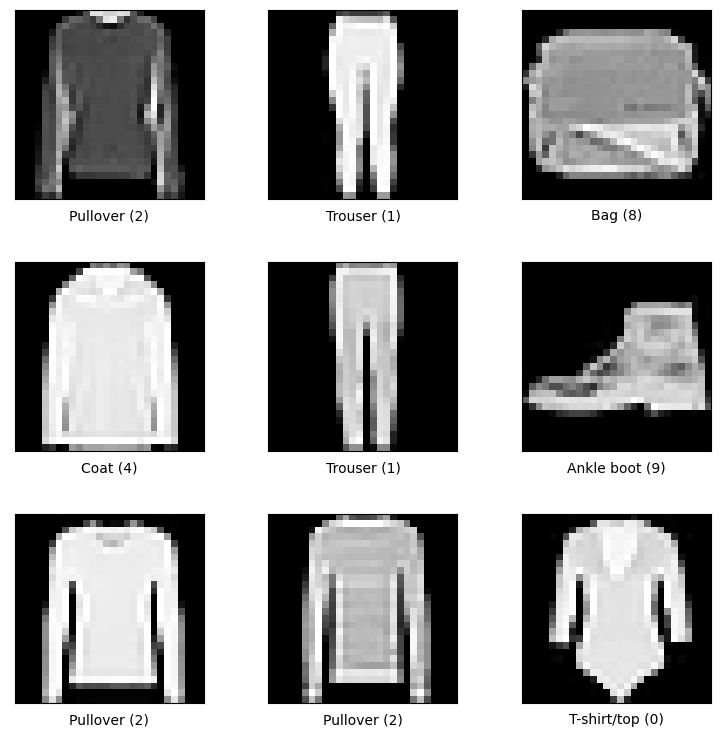

In [1]:
import tensorflow_datasets as tfds
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers, regularizers
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

dataset, ds_info = tfds.load('fashion_mnist', split='train', with_info=True)
fig = tfds.show_examples(dataset, ds_info)

After obtaining the dataset and importing the relevant libraries, I move onto splitting the data by first loading the data and joining the data together since it has been separated into training and tests sets. After getting the full set we proceed to train test split 2 times to get a training dataset, a testing dataset and a validation dataset. I will be setting the random state to 12345 so that the split is reproducible.

In [2]:
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

#concatenate to get all 70000 images before splitting
x = np.concatenate([train_x, test_x])
y = np.concatenate([train_y, test_y])

#first split the images into training and test + val set
#split the test + val set
#random state is 12345 to repeat results
trainX, valX, trainY, valY = train_test_split(x, y, test_size=0.4, train_size=0.6, random_state=12345)
testX, valX, testY, valY = train_test_split(valX, valY, test_size=0.5, train_size=0.5, random_state=12345)

<h2>Choosing a measure of success</h2>

<p>
    Following the next step of the universal workflow of machine learning, we have to decide our measure of success.
</p>

<p>
    I have decided to use both accuracy and loss as a measure of success. Since I am splitting the data randomly, there might be a majority of one class and if the model just picks that class and is able to score higher than the baseline, it will not be accurate. So, with loss included, it will tell us how far off the predicted values are from the actual values. This will ensure that the model will not just learn how to randomly guess the majority class.
</p>

<h3>Creating helper functions to help plot loss and accuracy</h3>

I am creating these functions to help me plot the loss and accuracy graphs. This is so that when we are building a model, it will show if the model is underfitting, overfitting or if it is a good fit. With all these information, it cna help to improve the model that I will be building.

In [3]:
def plot_loss(loss, val_loss):
    plt.clf()
    epochs = range(1, len(loss) + 1)
    blue_dots = 'bo'
    solid_blue_line = 'b'
    
    #plot the values
    plt.plot(epochs, loss, blue_dots, label = 'Training loss')
    plt.plot(epochs, val_loss, solid_blue_line, label = 'Validation loss')
    
    #title and label of graphs and axes
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()
    
def plot_accuracy(acc, val_acc):
    plt.clf()
    epochs = range(1, len(acc) + 1)

    blue_dots = 'bo'
    solid_blue_line = 'b'

    #plot the values
    plt.plot(epochs, acc, blue_dots, label = 'Training accuracy')
    plt.plot(epochs, val_acc, solid_blue_line, label = 'Validation accuracy')
    
    #title and lavel of graphs and axes
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

<h2>Evaluation protocol</h2>

In the next step of the universal workflow of machine learning, we have to choose an evaluation protocol. I have decided to use maintaining a hold-out validation set as the choice of evaluation protocol as I believe that I have plenty of data.

<h2>Preparing the data</h2>

<p>
    After splitting our data, we need to prepare our data before it can be fed into the machine learning model to train and test it.
</p>
<p>
    First we have to reshape the data from a 2d array to 1d.
    <br>
    Next, we scale the data by casting it to a float and dividing by 255 since the colour value range is from 0 to 255 to get the range of the data to be inbetween 0 and 1
    <br>
    Finally, we one hot encode the labels
</p>

In [4]:
#reshape data from 2d to 1d
trainX = trainX.reshape(42000, 28 * 28)
testX = testX.reshape(14000, 28 * 28)
valX = valX.reshape(14000, 28 * 28)

#casting the data to float32 and dividing by 255
trainX = trainX.astype('float32')/255
testX = testX.astype('float32')/255
valX = valX.astype('float32')/255

#one hot encode the labels
trainY = to_categorical(trainY)
testY = to_categorical(testY)
valY = to_categorical(valY)

<h2>Developing a model that would do better than the Baseline</h2>

<p>
    I have decided to choose 10% or 0.1 as my baseline. This is due to the fact that by looking at the number of labels which range from 0 to 9, the model has a 1 in 10 chance to pick the right label. Thus, to achieve statistical power, I have to develop a model that has to achieve an accuracy that is greater than 0.1.
</p>
<p>
    For our model, I have decided to use softmax as the last-layer activation, categorical_crossentropy for the loss function and finally rmsprop for my optimizer. This is because softmax as last-layer activation and categorical_crossentropy is the default last-layer activcation and loss function for multiclass, single label problems. I chose rmsprop as it is a safe optimizer to use.
</p>

<h3>Developing model that has statistical power</h3>

First, I have to create a model that would have a higher accuracy than the baseline to have statistical power which in this case is 0.1. I will first create a model that has the last activation layer. In this case, the model will be underfitting as there is only one layer.

In [5]:
#create the model
basic_model = models.Sequential()

#add the last activation layer
basic_model.add(layers.Dense(10, activation="softmax"))

#optimizer, loss function and metrics for compile
basic_model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=['accuracy'])

#train the model
history = basic_model.fit(trainX, trainY, epochs=10, batch_size=128, validation_data=(valX,valY))

#show the model
basic_model.summary()

Epoch 1/10
329/329 [==============================] - 1s 1ms/step - loss: 0.7713 - accuracy: 0.7453 - val_loss: 0.5695 - val_accuracy: 0.8047
Epoch 2/10
329/329 [==============================] - 0s 772us/step - loss: 0.5312 - accuracy: 0.8202 - val_loss: 0.5244 - val_accuracy: 0.8146
Epoch 3/10
329/329 [==============================] - 0s 781us/step - loss: 0.4888 - accuracy: 0.8344 - val_loss: 0.4802 - val_accuracy: 0.8388
Epoch 4/10
329/329 [==============================] - 0s 775us/step - loss: 0.4664 - accuracy: 0.8412 - val_loss: 0.4697 - val_accuracy: 0.8366
Epoch 5/10
329/329 [==============================] - 0s 740us/step - loss: 0.4523 - accuracy: 0.8462 - val_loss: 0.4886 - val_accuracy: 0.8249
Epoch 6/10
329/329 [==============================] - 0s 729us/step - loss: 0.4422 - accuracy: 0.8499 - val_loss: 0.4518 - val_accuracy: 0.8420
Epoch 7/10
329/329 [==============================] - 0s 731us/step - loss: 0.4339 - accuracy: 0.8514 - val_loss: 0.4810 - val_accuracy: 0

After training the model, we plot the accuracy and the loss and finally re-evaluate it against the validation set.

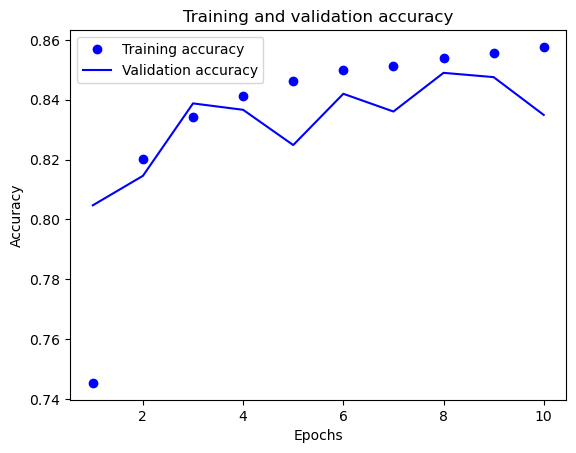

In [6]:
#plot the accuracy
plot_accuracy(history.history['accuracy'], history.history['val_accuracy'])

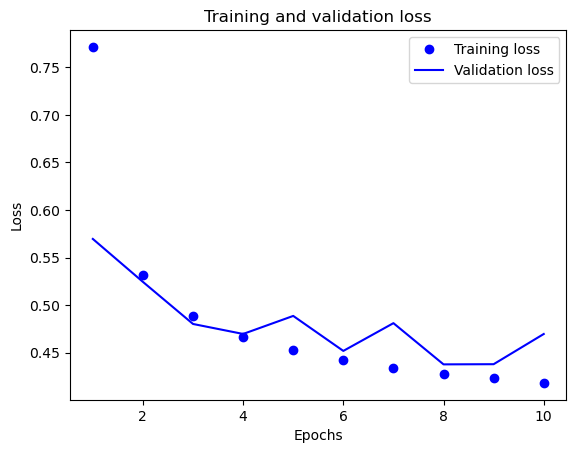

In [7]:
#plot the loss
plot_loss(history.history['loss'], history.history['val_loss'])

In [8]:
val_loss, val_acc = basic_model.evaluate(valX, valY)

438/438 [==============================] - 0s 436us/step - loss: 0.4696 - accuracy: 0.8349


As we can see, the model has an accuracy of 0.8349 which is greater than 0.1. This means that the model has statistical power. This means that we need to scale our model up so we have to develop a model that overfits to get the ideal model.

<h3>Developing model that overfits</h3>

To develop a model that overfits, we will add layers, make the layers bigger and train for more epochs.

In [9]:
#create model
overfit_model = models.Sequential()

#add layers
overfit_model.add(layers.Dense(512, activation="relu", input_shape=(28 * 28, )))
overfit_model.add(layers.Dense(128, activation="relu"))
overfit_model.add(layers.Dense(64, activation="relu"))
overfit_model.add(layers.Dense(10, activation="softmax"))

#optimizer, loss function and metrics for compile
overfit_model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=['accuracy'])

#train the model
history2 =  overfit_model.fit(trainX, trainY, epochs=40, batch_size=128, validation_data=(valX,valY))

#show the model
overfit_model.summary()

Epoch 1/40
329/329 [==============================] - 2s 5ms/step - loss: 0.6407 - accuracy: 0.7688 - val_loss: 0.7405 - val_accuracy: 0.7031
Epoch 2/40
329/329 [==============================] - 2s 5ms/step - loss: 0.4251 - accuracy: 0.8430 - val_loss: 0.6595 - val_accuracy: 0.7744
Epoch 3/40
329/329 [==============================] - 2s 5ms/step - loss: 0.3766 - accuracy: 0.8614 - val_loss: 0.5932 - val_accuracy: 0.7959
Epoch 4/40
329/329 [==============================] - 2s 5ms/step - loss: 0.3419 - accuracy: 0.8725 - val_loss: 0.4196 - val_accuracy: 0.8466
Epoch 5/40
329/329 [==============================] - 2s 5ms/step - loss: 0.3214 - accuracy: 0.8802 - val_loss: 0.6203 - val_accuracy: 0.8192
Epoch 6/40
329/329 [==============================] - 2s 5ms/step - loss: 0.2999 - accuracy: 0.8885 - val_loss: 0.6128 - val_accuracy: 0.7853
Epoch 7/40
329/329 [==============================] - 1s 5ms/step - loss: 0.2854 - accuracy: 0.8928 - val_loss: 0.5310 - val_accuracy: 0.8176
Epoch 

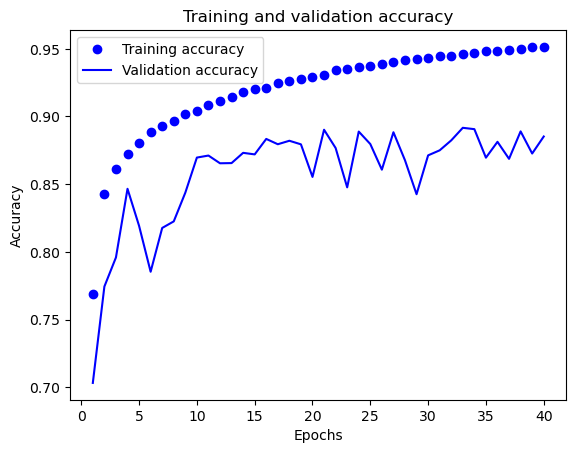

In [10]:
#plot the accuracy
plot_accuracy(history2.history['accuracy'], history2.history['val_accuracy'])

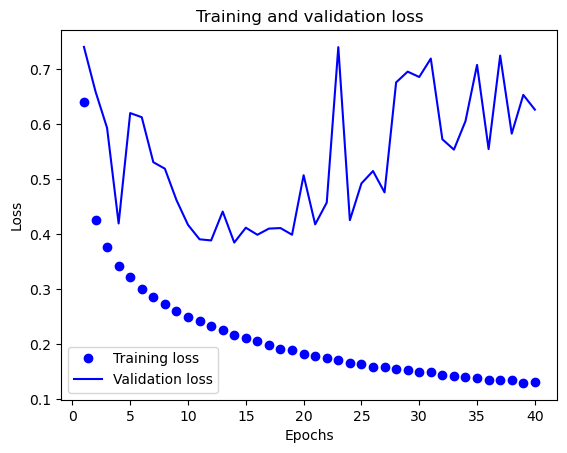

In [11]:
#plot the loss
plot_loss(history2.history['loss'], history2.history['val_loss'])

In [12]:
val_loss, val_acc = overfit_model.evaluate(valX, valY)

438/438 [==============================] - 0s 829us/step - loss: 0.6266 - accuracy: 0.8852


As we can see, the model achieved an accuracy of 0.8852 which is a definite improvement over the 0.8349 that we obtained earlier. However, from the graphs we can see that there is a difference between the validation accuracy and loss and the training accuracy and loss. This means that there is overfitting.

<h2>Regularising the model</h2>

<h3>Adding dropout</h3>

After creating the model that is overfitted, we need to amend the model such that we get a good fit. I will first try adding dropout and see how it affects the model.

In [13]:
#create model
dropout_model = models.Sequential()

#add layers and dropout
dropout_model.add(layers.Dense(512, activation="relu", input_shape=(28 * 28, )))
dropout_model.add(layers.Dropout(0.5))
dropout_model.add(layers.Dense(128, activation="relu"))
dropout_model.add(layers.Dense(64, activation="relu"))
dropout_model.add(layers.Dropout(0.5))
dropout_model.add(layers.Dense(10, activation="softmax"))

#optimizer, loss function and metrics for compile
dropout_model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=['accuracy'])

#train the model
dropoutResults =  dropout_model.fit(trainX, trainY, epochs=40, batch_size=128, validation_data=(valX,valY))

#show the model
dropout_model.summary()

Epoch 1/40
329/329 [==============================] - 2s 5ms/step - loss: 0.8333 - accuracy: 0.7070 - val_loss: 0.4894 - val_accuracy: 0.8228
Epoch 2/40
329/329 [==============================] - 2s 5ms/step - loss: 0.5628 - accuracy: 0.8053 - val_loss: 0.4906 - val_accuracy: 0.8229
Epoch 3/40
329/329 [==============================] - 2s 5ms/step - loss: 0.5018 - accuracy: 0.8245 - val_loss: 0.4583 - val_accuracy: 0.8347
Epoch 4/40
329/329 [==============================] - 2s 5ms/step - loss: 0.4743 - accuracy: 0.8350 - val_loss: 0.4080 - val_accuracy: 0.8502
Epoch 5/40
329/329 [==============================] - 2s 5ms/step - loss: 0.4482 - accuracy: 0.8432 - val_loss: 0.4564 - val_accuracy: 0.8334
Epoch 6/40
329/329 [==============================] - 2s 5ms/step - loss: 0.4371 - accuracy: 0.8480 - val_loss: 0.3655 - val_accuracy: 0.8687
Epoch 7/40
329/329 [==============================] - 2s 5ms/step - loss: 0.4214 - accuracy: 0.8530 - val_loss: 0.3845 - val_accuracy: 0.8564
Epoch 

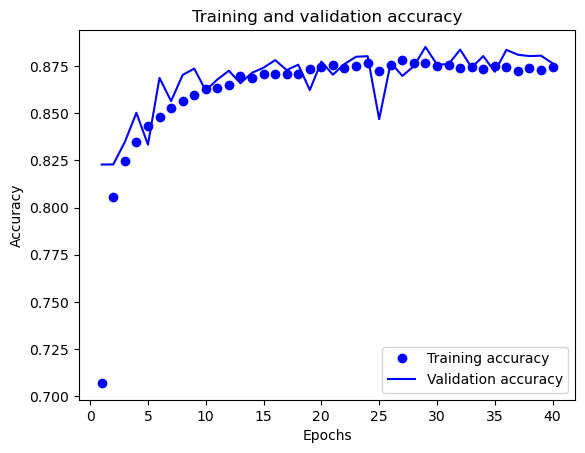

In [14]:
#plot the accuracy
plot_accuracy(dropoutResults.history['accuracy'], dropoutResults.history['val_accuracy'])

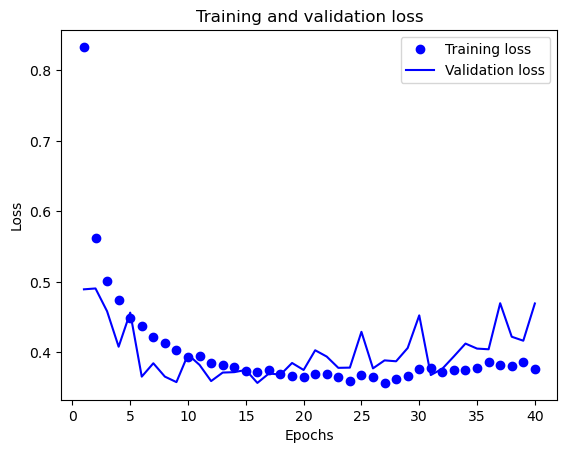

In [15]:
#plot the loss
plot_loss(dropoutResults.history['loss'], dropoutResults.history['val_loss'])

In [16]:
val_loss, val_acc = dropout_model.evaluate(valX, valY)

438/438 [==============================] - 0s 929us/step - loss: 0.4693 - accuracy: 0.8764


<h3>Adding L1 and/or L2 regularization</h3>

In [17]:
#create model
l_model = models.Sequential()

#add layers
l_model.add(layers.Dense(512, activation="relu", input_shape=(28 * 28, )))
l_model.add(layers.Dense(128, kernel_regularizer=regularizers.l2(0.001), activation="relu"))
l_model.add(layers.Dense(64, kernel_regularizer=regularizers.l1(0.001), activation="relu"))
l_model.add(layers.Dense(10, activation="softmax"))

#optimizer, loss function and metrics for compile
l_model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=['accuracy'])

#train the model
regResults =  l_model.fit(trainX, trainY, epochs=40, batch_size=128, validation_data=(valX,valY))

#show the model
l_model.summary()

Epoch 1/40
329/329 [==============================] - 2s 5ms/step - loss: 1.1432 - accuracy: 0.7690 - val_loss: 1.3695 - val_accuracy: 0.6435
Epoch 2/40
329/329 [==============================] - 2s 5ms/step - loss: 0.6874 - accuracy: 0.8386 - val_loss: 0.7016 - val_accuracy: 0.8080
Epoch 3/40
329/329 [==============================] - 1s 4ms/step - loss: 0.5548 - accuracy: 0.8552 - val_loss: 0.6977 - val_accuracy: 0.8136
Epoch 4/40
329/329 [==============================] - 1s 4ms/step - loss: 0.4891 - accuracy: 0.8652 - val_loss: 0.7272 - val_accuracy: 0.7896
Epoch 5/40
329/329 [==============================] - 2s 5ms/step - loss: 0.4490 - accuracy: 0.8713 - val_loss: 0.5508 - val_accuracy: 0.8246
Epoch 6/40
329/329 [==============================] - 2s 5ms/step - loss: 0.4192 - accuracy: 0.8784 - val_loss: 0.5420 - val_accuracy: 0.8369
Epoch 7/40
329/329 [==============================] - 2s 5ms/step - loss: 0.3956 - accuracy: 0.8845 - val_loss: 0.5064 - val_accuracy: 0.8464
Epoch 

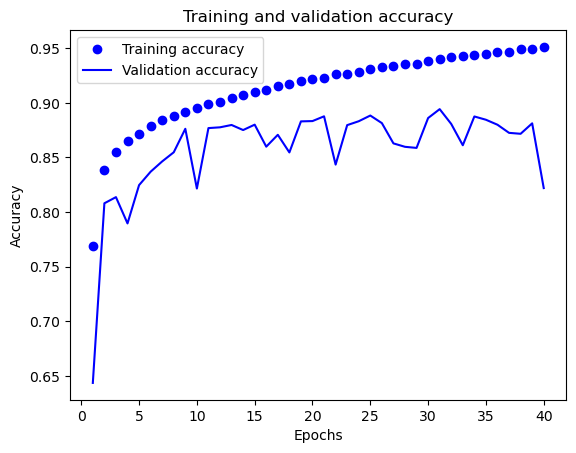

In [18]:
#plot the accuracy
plot_accuracy(regResults.history['accuracy'], regResults.history['val_accuracy'])

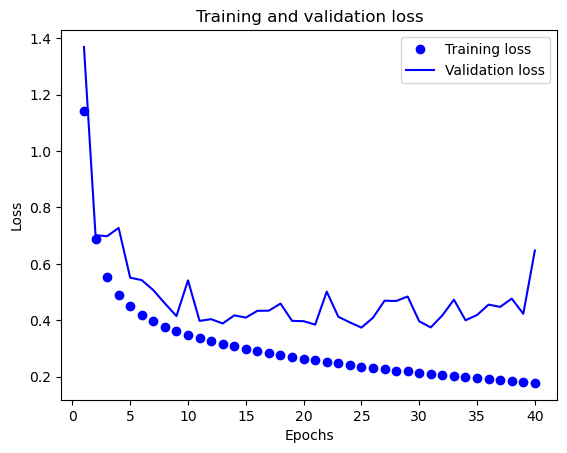

In [19]:
#plot the loss
plot_loss(regResults.history['loss'], regResults.history['val_loss'])

In [20]:
val_loss, val_acc = l_model.evaluate(valX, valY)

438/438 [==============================] - 0s 864us/step - loss: 0.6470 - accuracy: 0.8219


It can be seen that adding dropout and L1 and L2 regularisation helps to reduce the difference between the training and validation loss and accuracy. However, no matter how many dropout I change and add and no matter how much I added L1 and L2 regularization, I could not seem to obtain the targeted accuracy and loss difference that I wanted. Therefore, I plan on implementing both to improve my model.

In [21]:
#create model
goodfit_model = models.Sequential()

#add layers
goodfit_model.add(layers.Dense(512, activation="relu", input_shape=(28 * 28, )))
goodfit_model.add(layers.Dropout(0.65))
goodfit_model.add(layers.Dense(128, kernel_regularizer=regularizers.l2(0.001), activation="relu"))
goodfit_model.add(layers.Dense(64, activation="relu"))
goodfit_model.add(layers.Dense(10, activation="softmax"))

#optimizer, loss function and metrics for compile
goodfit_model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=['accuracy'])

#train the model
goodfitResults =  goodfit_model.fit(trainX, trainY, epochs=40, batch_size=128, validation_data=(valX,valY))

#show the model
goodfit_model.summary()

Epoch 1/40
329/329 [==============================] - 2s 5ms/step - loss: 0.8725 - accuracy: 0.7319 - val_loss: 0.6631 - val_accuracy: 0.7950
Epoch 2/40
329/329 [==============================] - 2s 5ms/step - loss: 0.5947 - accuracy: 0.8113 - val_loss: 0.5571 - val_accuracy: 0.8108
Epoch 3/40
329/329 [==============================] - 2s 5ms/step - loss: 0.5261 - accuracy: 0.8284 - val_loss: 0.4873 - val_accuracy: 0.8344
Epoch 4/40
329/329 [==============================] - 2s 5ms/step - loss: 0.4872 - accuracy: 0.8366 - val_loss: 0.5024 - val_accuracy: 0.8178
Epoch 5/40
329/329 [==============================] - 2s 5ms/step - loss: 0.4617 - accuracy: 0.8452 - val_loss: 0.4695 - val_accuracy: 0.8390
Epoch 6/40
329/329 [==============================] - 2s 5ms/step - loss: 0.4456 - accuracy: 0.8485 - val_loss: 0.4149 - val_accuracy: 0.8595
Epoch 7/40
329/329 [==============================] - 2s 5ms/step - loss: 0.4308 - accuracy: 0.8523 - val_loss: 0.4242 - val_accuracy: 0.8565
Epoch 

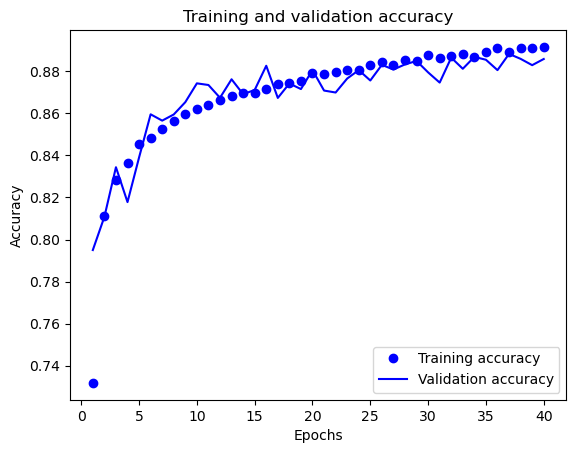

In [22]:
#plot the accuracy
plot_accuracy(goodfitResults.history['accuracy'], goodfitResults.history['val_accuracy'])

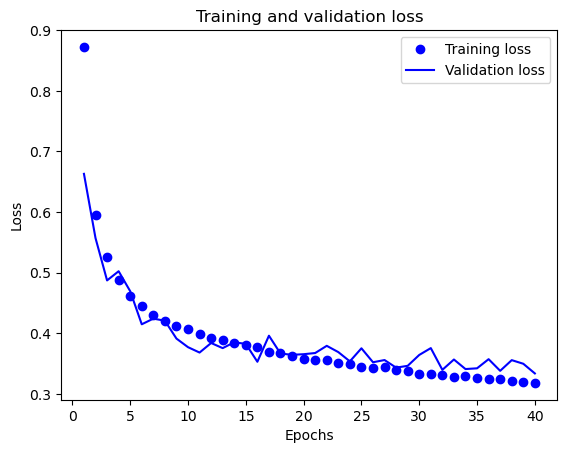

In [23]:
#plot the loss
plot_loss(goodfitResults.history['loss'], goodfitResults.history['val_loss'])

In [24]:
val_loss, val_acc = goodfit_model.evaluate(valX, valY)

438/438 [==============================] - 0s 936us/step - loss: 0.3338 - accuracy: 0.8858


After tuning my model multiple times, I feel that the model configuration is satisfactory so I will move on to testing it on the test set to see how well my model will do against it.

<h3>Final version of the model and testing against the test set</h3>

Since we are testing it on the test set, we will be combining the training set and validation set to train it.

In [25]:
#create model
best_model = models.Sequential()

#add layers
best_model.add(layers.Dense(512, activation="relu", input_shape=(28 * 28, )))
best_model.add(layers.Dropout(0.65))
best_model.add(layers.Dense(128, kernel_regularizer=regularizers.l2(0.001), activation="relu"))
best_model.add(layers.Dense(64, activation="relu"))
best_model.add(layers.Dense(10, activation="softmax"))

#optimizer, loss function and metrics for compile
best_model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=['accuracy'])

#combine the training and validation set
finaltrainX = np.concatenate([trainX, valX])
finaltrainY = np.concatenate([trainY, valY])

#train the model
best_fit =  best_model.fit(finaltrainX, finaltrainY, epochs=40, batch_size=128)


Epoch 1/40
438/438 [==============================] - 2s 5ms/step - loss: 0.8084 - accuracy: 0.7488
Epoch 2/40
438/438 [==============================] - 2s 5ms/step - loss: 0.5558 - accuracy: 0.8201
Epoch 3/40
438/438 [==============================] - 2s 5ms/step - loss: 0.4951 - accuracy: 0.8346
Epoch 4/40
438/438 [==============================] - 2s 5ms/step - loss: 0.4669 - accuracy: 0.8432
Epoch 5/40
438/438 [==============================] - 2s 5ms/step - loss: 0.4443 - accuracy: 0.8492
Epoch 6/40
438/438 [==============================] - 2s 5ms/step - loss: 0.4318 - accuracy: 0.8534
Epoch 7/40
438/438 [==============================] - 2s 5ms/step - loss: 0.4177 - accuracy: 0.8562
Epoch 8/40
438/438 [==============================] - 2s 5ms/step - loss: 0.4072 - accuracy: 0.8604
Epoch 9/40
438/438 [==============================] - 2s 5ms/step - loss: 0.4026 - accuracy: 0.8632
Epoch 10/40
438/438 [==============================] - 2s 4ms/step - loss: 0.3943 - accuracy: 0.8640

In [26]:
test_loss, test_acc = best_model.evaluate(testX, testY)

438/438 [==============================] - 0s 915us/step - loss: 0.3244 - accuracy: 0.8900


The next step would be to use various measures to evaluate my model.
<br>
<br>
I have decided to first use a confusion matrix and plotting it so we can roughly see how well my model obtains the 
<br>
Next, I have decided to use macro average f1 score as the classes are imbalanced so if I were to use micro average f1 score, it will not give us an accurate measure of the model.
<br>
Finally, micro average precision and micro average recall to see how well the model did on average per class

438/438 [==============================] - 0s 901us/step
[2 5 9 1 2 3 0 2 2 7]
[2 5 9 1 2 3 0 2 2 7]

F1 macro score = 0.88825

Precision score = 0.89000

Recall score = 0.89000


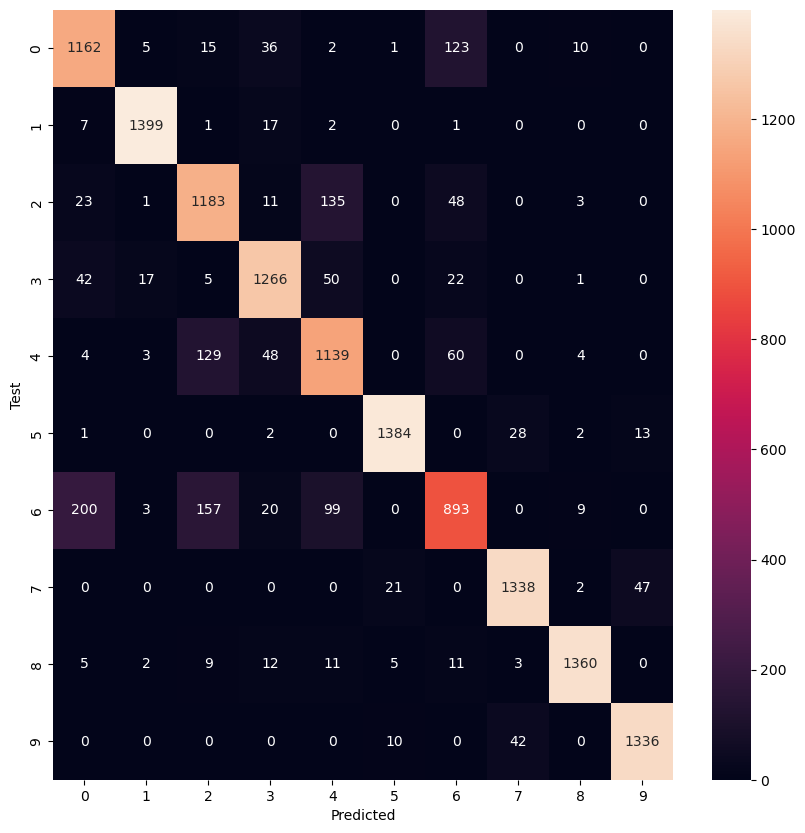

In [27]:
#import seaborn so that we can use heatmap to plot our confusion matrix
import seaborn as sb

#get the predicted  values
predictedY = best_model.predict(testX)

#convert from one hot encoding to normal
predY = np.argmax(predictedY, axis=1)
newtestY = np.argmax(testY, axis=1)
print(predY[:10])
print(newtestY[:10])

#confusion matrix
conf = confusion_matrix(newtestY, predY)
plt.figure(figsize=(10,10))
sb.heatmap(conf, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Test")

#f1 score
f = f1_score(newtestY, predY, average="macro")
print("\nF1 macro score = %0.5f\n" %f)

#precision and recall
prec = precision_score(newtestY, predY, average="micro")
rec = recall_score(newtestY, predY, average="micro")
print("Precision score = %0.5f" %prec)
print("\nRecall score = %0.5f" %rec)


<h2>Conclusion</h2>

<h3>Analysis of the results from the various measures</h3>

<p>
    From the various evaluation measures, it can be seen that the model is able to do quite well against the test set. This can be seen by the 89% accuracy rate and further supported by the macro average f1 score being 88.825% which is considered to be good.
</p>

<h3>Summary</h3>

<p>
    Following the universal workflow of machine learning, I first defined the problem which was to predict the type of clothing based on the picture that is presented and I used the fashion MNIST dataset.
</p>
<p>
    Next, to measure my success on the problem, I decided to use loss and accuracy to monitor my success on the validation data. On top of this, I have decided to use hold-out validation for my evaluation protocol which meant that I had to split my data into a training set, validation set and test set.
</p>
<p>
    After that I first developed a model that does better than my baseline so that it has statistical power before I moved onto creating a model that overfits.
</p>
<p>
    Finally I regularized my model and after many rounds of tuning which was left out as it would take too many code blocks, I finally settled on the model that I was satisfied with and tested it against the test set and from the results, it can be seen that my model did quite well.
</p>